In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    plt.show()

df = pd.read_csv('ze_final.csv')

In [3]:
df = df[df['centro'] == 'CFP']


**Perfil dos Estudantes na Amostra**

- 58% evadiram
- 73% possuem cidade de origem diferente da cidade do campus
- 61% são do sexo feminino
- Idade média dos estudantes é 24

In [4]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['event'].value_counts(normalize=True))

1    0.587191
0    0.412809
Name: event, dtype: float64


In [5]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

print(df[idx]['sexo'].value_counts(normalize=True))

print(df[idx]['idade'].mean())


1    0.733584
0    0.266416
Name: is_outra_cidade, dtype: float64
0    0.612487
1    0.387513
Name: sexo, dtype: float64
24.113832077502693


**Taxa de evasão é maior para estudantes cuja origem difere da cidade do campus?**

- Taxa de evasão é maior para estudantes cuja cidade de origem difere daquela do campus (60% vs 53%)

   is_outra_cidade  event    percent
0                0      1  53.030303
1                0      0  46.969697
2                1      1  60.785033
3                1      0  39.214967


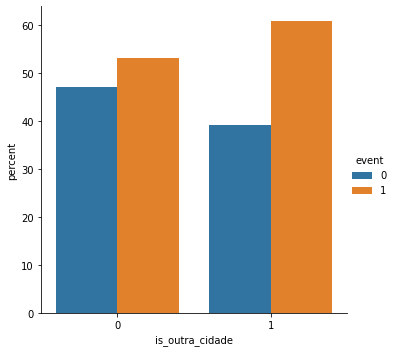

In [6]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

#print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_outra_cidade', 'event')

**Taxa de evasão é maior para ingressantes no 1o semestre?**

- Evasão é maior entre ingressantes no 2o semestre (64% vs 55%)

1    0.604413
2    0.395587
Name: semestreIngresso, dtype: float64


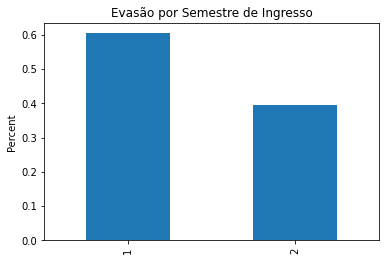

In [7]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')
counts = df.loc[idx, 'semestreIngresso'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Semestre de Ingresso')
plt.show()


1    0.604413
2    0.395587
Name: semestreIngresso, dtype: float64
   semestreIngresso  event    percent
0                 1      1  55.075690
1                 1      0  44.924310
2                 2      1  64.285714
3                 2      0  35.714286


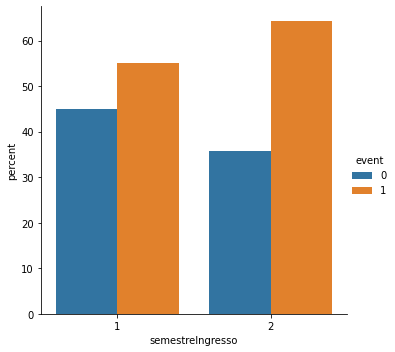

In [8]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreIngresso'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreIngresso', 'event')

**Taxa de evasão no 2o semestre letivo é maior?**

- Evasão é maior no 2o semestre letivo (62% vs 55%). Por quê? O SISU pode ser uma linha de investigação.

2    0.514207
1    0.485793
Name: semestreLetivo, dtype: float64


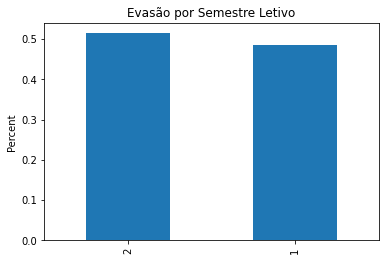

In [9]:
idx = df['event'] == 1

counts = df.loc[idx, 'semestreLetivo'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Semestre Letivo')
plt.show()


1    0.515608
2    0.484392
Name: semestreLetivo, dtype: float64
   semestreLetivo  event    percent
0               1      1  55.323591
1               1      0  44.676409
2               2      1  62.333333
3               2      0  37.666667


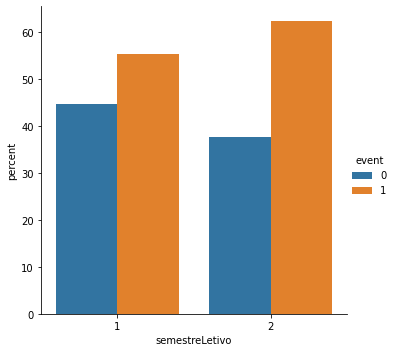

In [10]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreLetivo'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreLetivo', 'event')

**Há interação entre evasão e o sexo do estudante?**

- Taxa de evasão é maior entre homens (64% vs 55%).

0    0.574244
1    0.425756
Name: sexo, dtype: float64


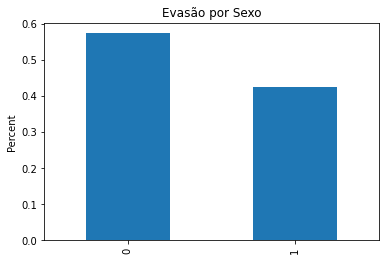

In [11]:
idx = df['event'] == 1

counts = df.loc[idx, 'sexo'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Sexo')
plt.show()

0    0.612487
1    0.387513
Name: sexo, dtype: float64
   sexo  event    percent
0     0      1  55.052724
1     0      0  44.947276
2     1      1  64.513889
3     1      0  35.486111


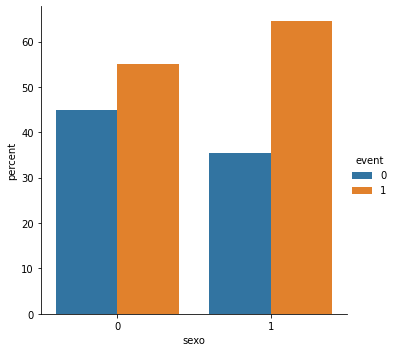

In [12]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['sexo'].value_counts(normalize=True))

plot_percentage(df[idx], 'sexo', 'event')

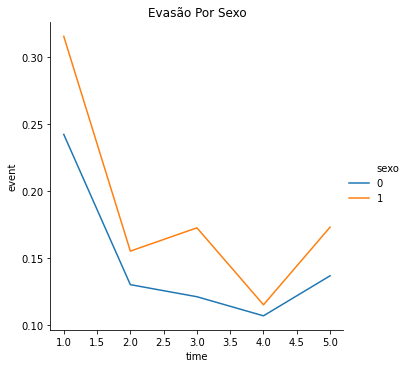

In [13]:
data = df.groupby(['time','sexo']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='sexo',  kind="line")    
ax.set(title='Evasão Por Sexo')    

**Como se comporta a taxa de evasão com o tempo?**

- A taxa de evasão tende a decrescer com o tempo

[Text(0.5, 1.0, 'Evasão Geral')]

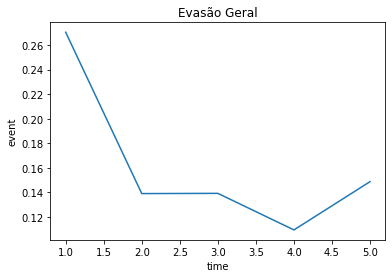

In [14]:
data = df.groupby('time').agg({'event':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='event', data=data)    
ax.set(title='Evasão Geral')

**Há diferenças entre cota e ampla concorrência?**

- Taxa de evasão é maior em estudantes de ampla concorẽncia (61% vs 56%)

0    0.500807
1    0.499193
Name: is_cotista, dtype: float64
   is_cotista  event    percent
0           0      1  61.096185
1           0      0  38.903815
2           1      1  56.334232
3           1      0  43.665768


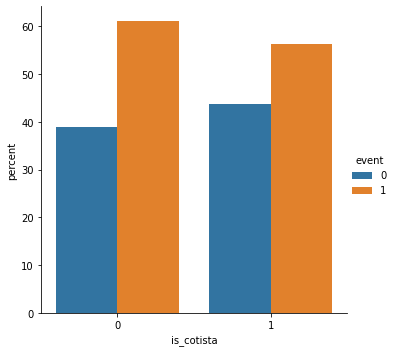

In [15]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_cotista'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_cotista', 'event')

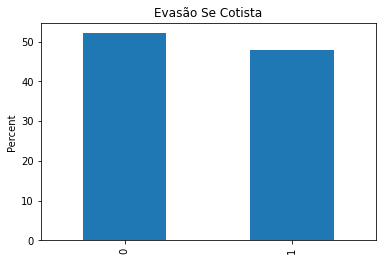

In [16]:
idx = df['event'] == 1

ax = df.loc[idx, 'is_cotista'].value_counts(normalize=True).mul(100).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Se Cotista')
plt.show()

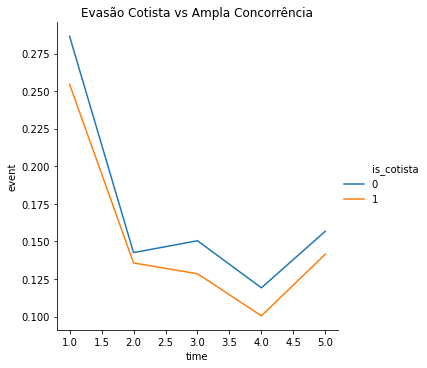

In [17]:
data = df.groupby(['time','is_cotista']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='is_cotista',  kind="line")    
ax.set(title='Evasão Cotista vs Ampla Concorrência')    

**A idade de ingresso afeta a taxa de evasão?**

- Idade parece não explicar a taxa evasão

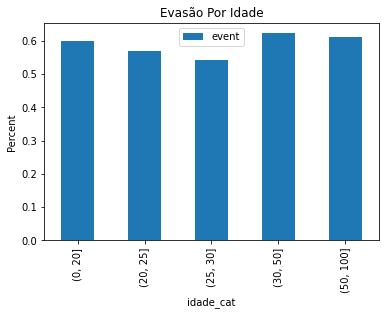

In [18]:
col = 'idade_cat'
df[col] = pd.cut(df.idade, bins=[0,20,25,30,50,100])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')


ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Idade')
plt.show()

**Gap (tempo entre o término do ensino médio e o ingresso no curso) afeta a evasão?**

- Gap parece não afetar a taxa de evasão

(0.0, 1.0]      0.268859
(1.0, 2.0]      0.170213
(10.0, 36.0]    0.145620
(2.0, 3.0]      0.106659
(3.0, 4.0]      0.075159
(4.0, 5.0]      0.063001
(5.0, 6.0]      0.049185
(6.0, 7.0]      0.037303
(7.0, 8.0]      0.034540
(9.0, 10.0]     0.025974
(8.0, 9.0]      0.023487
Name: gap_cat, dtype: float64


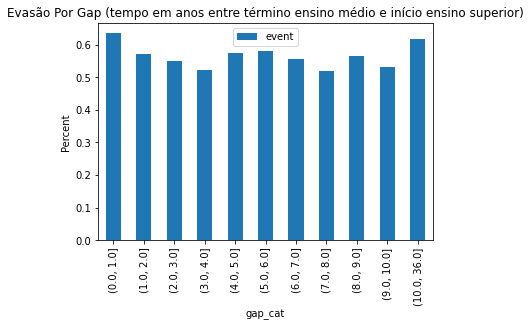

In [19]:
col = 'gap_cat'
df[col] = pd.cut(df.gap, bins=[0,1,2,3,4,5,6,7,8,9,10, df.gap.max()])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx][col].value_counts(normalize=True))

ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Gap (tempo em anos entre término ensino médio e início ensino superior)')
plt.show()